# Análise de series temporais

Dados de series temporais assumem cada vez mais importancia com a era da internet das coisas (IoT), da digitalizacao de sistemas de hospitais e das cidades inteligentes. Podemos esperar que dados dessa forma crescam exponencialmente com mais qualidade, quantidade e revelencia. 
Por esse motivo, cria-se uma demanda para o estudo e analise de dados de series temporais.


# Motivação e Importância

As séries temporais são um campo fascinante e em constante evolução da análise de dados.

Ao estudar séries temporais, é possível explorar conceitos complexos, como autocorrelação, estacionariedade, sazonalidade e modelos preditivos. Além disso, há uma grande variedade de técnicas disponíveis para análise de séries temporais, como ARIMA, modelos de suavização exponencial, redes neurais, entre outros.

# Objetivos

O objetivo deste trabalho é entender e aplicar técnicas de análise e modelagem para prever comportamentos futuros de uma série temporal de interesse. Para isso, serão explorados conceitos como autocorrelação, estacionariedade, sazonalidade e modelos preditivos, a fim de obter uma compreensão mais profunda dos dados.

# Revisão Bibliografica

## Datasets

- https://archive-beta.ics.uci.edu/dataset/235/individual+household+electric+power+consumption

## Tutoriais

- https://towardsdatascience.com/5-types-of-plots-that-will-help-you-with-time-series-analysis-b63747818705
- https://youtu.be/vV12dGe_Fho
- https://youtu.be/z3ZnOW-S550
- https://youtu.be/xi0vhXFPegw

## Artigos

- https://arxiv.org/pdf/2004.13408.pdf
- https://arxiv.org/pdf/2205.13504v3.pdf

# Prerequisitos

Extrair o .zip que se encontra dentro da pasta data.

! unzip data/household_power_consumption.zip -d data/

# Base de dados

Essa base de dados contem 2075259 medidas coletadas em uma casa na cidade de Sceaux (7km de Paris) entre Dezembro de 2006 e Novembro de 2010.

In [2]:
# general
import pandas as pd
import numpy as np

# stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [20, 5]

# settings
color_pal = sns.color_palette()

In [3]:
FILE_PATH = 'data/household_power_consumption.txt'

df = pd.read_csv(FILE_PATH, delimiter=';', dtype=str)

df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000


In [4]:
def join_date_and_time(df):
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
    df = df.drop(['Time'], axis=1)
    return df

In [5]:
df = join_date_and_time(df)

In [6]:
df = df.set_index('Date')
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000


# Tratamento dos dados

In [7]:
def clean(df):
    df = df.copy()
    for col in df.columns:
        df = df[~df[col].str.contains('?', regex=False)]
        df[col] = pd.to_numeric(df[col])
    return df

In [8]:
df = clean(df)

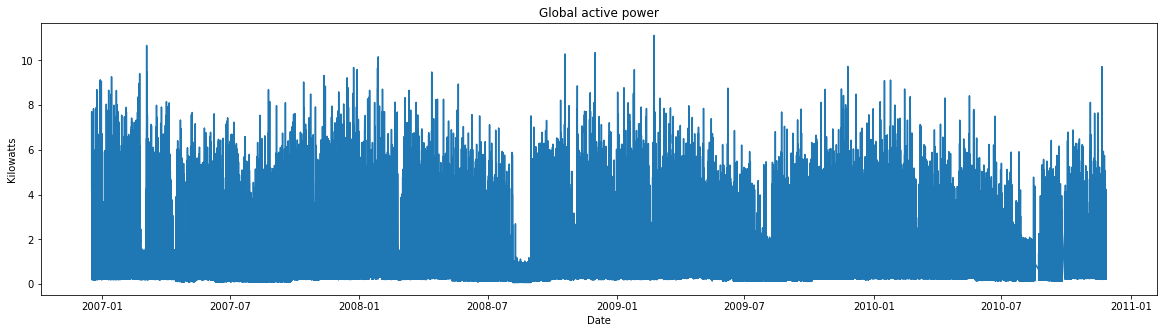

In [9]:
plt.title('Global active power')
plt.plot(df.index, df['Global_active_power'])
plt.xlabel('Date')
plt.ylabel('Kilowatts')
plt.show()

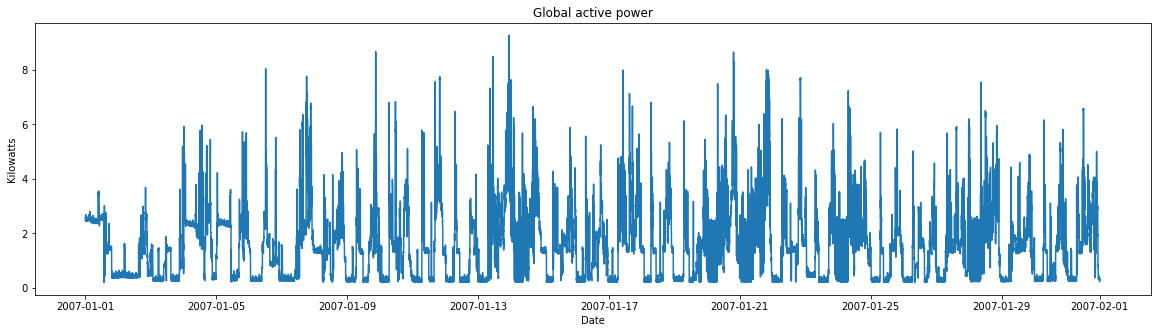

In [10]:
first_month_df = df.loc['2007-01-01':'2007-01-31']
plt.title('Global active power')
plt.plot(first_month_df.index, first_month_df['Global_active_power'])
plt.xlabel('Date')
plt.ylabel('Kilowatts')
plt.show()

Esse é um grafico de linha representando toda a base

# Dados a serem analisados

In [11]:
df = df.loc['2007-01-01':'2009-12-31']

In [12]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1.56989e+06,1.56989e+06,1.56989e+06,1.56989e+06,1.56989e+06,1.56989e+06,1.56989e+06
mean,1.08919,0.121943,240.635,4.62361,1.15931,1.34303,6.21624
std,1.08073,0.111891,3.30749,4.54475,6.28827,5.9722,8.34128
min,0.076,0,223.2,0.2,0,0,0
25%,0.3,0.046,238.73,1.4,0,0,0
50%,0.566,0.1,240.83,2.6,0,0,1
75%,1.524,0.192,242.76,6.4,0,1,17
max,11.122,1.39,254.15,48.4,82,78,31


<AxesSubplot:ylabel='Density'>

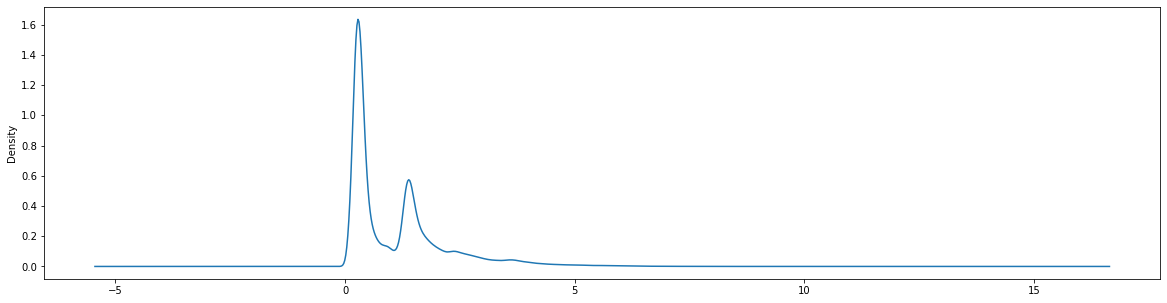

In [13]:
df['Global_active_power'].plot.kde()

Os dados estão condesados mais em baixo

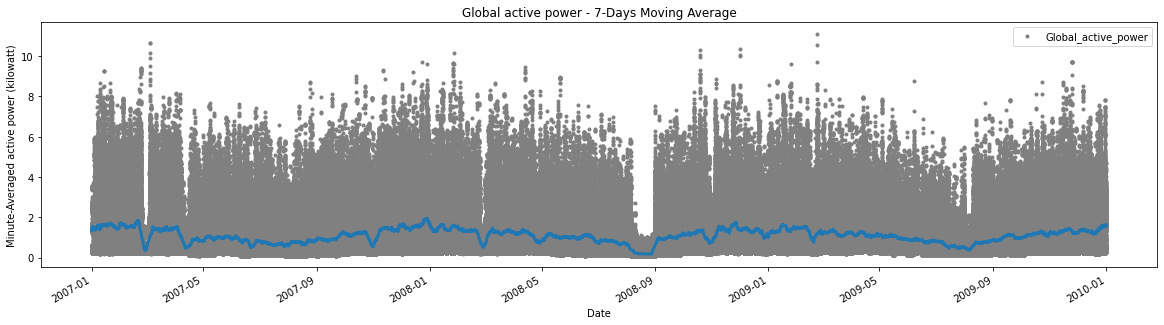

In [14]:
window = 24*60*7
df_gap = df[['Global_active_power']]

moving_average = df_gap.rolling(
    window=window,       # 7-day window
    center=True,
    min_periods=window//2,
).mean()

ax = df_gap.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Global active power - 7-Days Moving Average", legend=False, ylabel='Minute-Averaged active power (kilowatt)',
);

Média móvel de 7 dias

# Decomposição

Decompor a serie nos ajuda a entender como ela se encontra

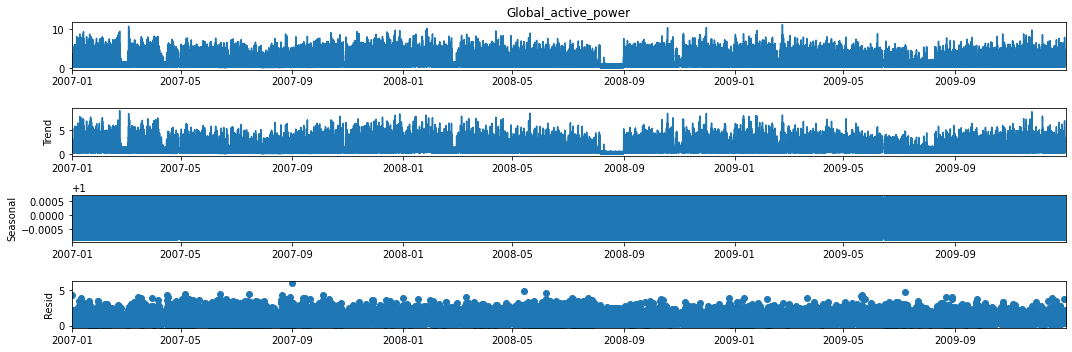

In [15]:
decomposition = seasonal_decompose(df['Global_active_power'], 
                                   model='multiplicative', 
                                   period=12)
fig = decomposition.plot();
fig.set_size_inches((15, 5))
fig.tight_layout()
plt.show()

# Sazonalidade

Vamos analisar se existem relações de tempo nesses dados

## Horas

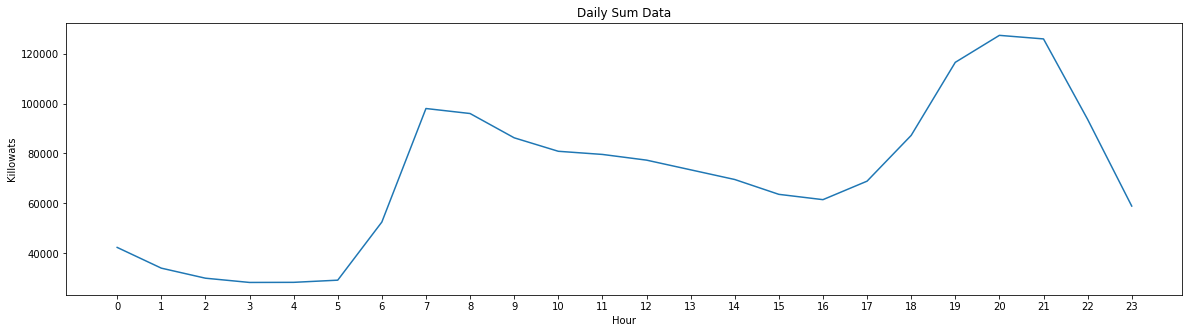

In [37]:
hourly_df = df.groupby(df.index.hour)['Global_active_power'].sum()

time = []

for x in range(0,24):
    time.append(x)
    
plt.plot(hourly_df.index, hourly_df)
plt.xticks(time)
plt.xlabel('Hour')
plt.ylabel('Killowats')
plt.title('Daily Sum Data')
plt.show()

Como é de se esperar, a madrugada tem um gasto energetico menor, a manha au

## Semana

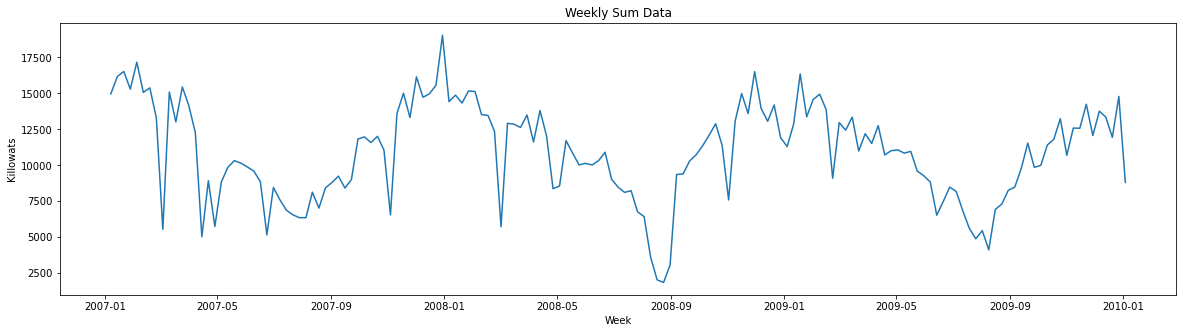

In [17]:
weekly_df = df.resample('W').sum()
weekly_df = weekly_df[['Global_active_power']]

plt.plot(weekly_df.index, weekly_df['Global_active_power'])
plt.xlabel('Week')
plt.ylabel('Killowats')
plt.title('Weekly Sum Data')
plt.show()

Podemos ver que existe um padrao sazional com um outlier em 2008

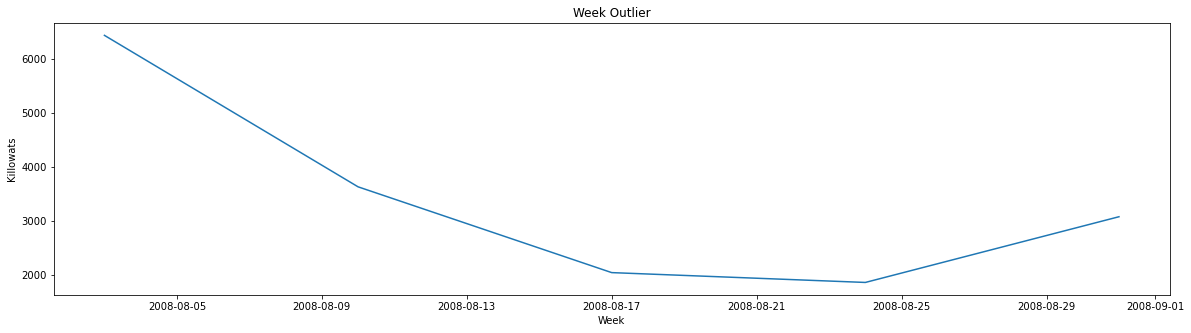

In [18]:
weekly_df = weekly_df.loc['2008-08-03':'2008-09-01']
plt.plot(weekly_df.index, weekly_df['Global_active_power'])
plt.xlabel('Week')
plt.ylabel('Killowats')
plt.title('Week Outlier')
plt.show()

Nsse grafico podemos ver que a semana 2008-08-17 ate a semana 2008-08-25 temos um outlier. 
Hipotese: Talvez a familia viajou de ferias?

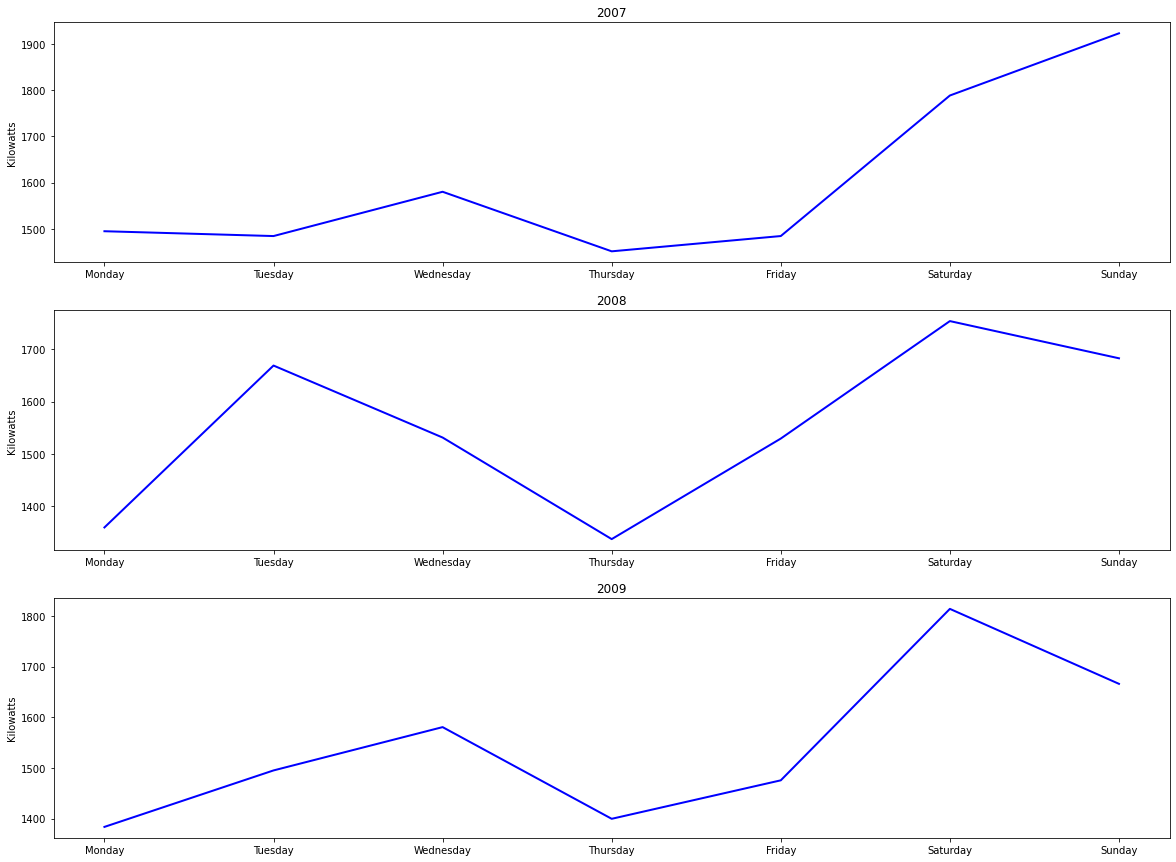

In [19]:
df_2007 = df.loc['2007-01-01':'2007-12-31']
df_2008 = df.loc['2008-01-01':'2008-12-31']
df_2009 = df.loc['2009-01-01':'2009-12-31']
plt.figure(figsize=(20,15))

weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

def plot_by_year(df, subplot, year):
    df = df[['Global_active_power']]
    weekday_index = pd.Index(weekday_names)
    
    ax = plt.subplot(subplot)
    # Plot weekdays mean
    weekday_groups = df.groupby(df.index.weekday).agg({'Global_active_power': ['sum']})
    weekday_groups.columns = weekday_groups.columns.droplevel(1)
    weekday_groups.index = weekday_index[weekday_groups.index]
    weekday_groups['Global_active_power'] = weekday_groups['Global_active_power'] / 52
    plt.plot(weekday_groups, linewidth=2, color='blue')
    
    grouped_data = df.groupby(pd.Grouper(freq='W'))
    
    # Loop through the groups and create a separate plot for each week
    for name, group in grouped_data:
        # Resample the data to daily frequency for the current week
        weekly_data = group.resample('D').sum()
        weekly_data['weekday'] = weekly_data.index.weekday
        
        weekly_data.index = weekday_index[weekly_data.weekday]
    
        # Create a plot for the current week
        plt.subplot(subplot)
        #plt.plot(weekly_data)
        plt.xticks([0,1,2,3,4,5,6], weekday_names)
        plt.ylabel('Kilowatts')
        plt.title(year)

    return ax

ax = plot_by_year(df_2007, 311, '2007')
plot_by_year(df_2008, 312, '2008')
plot_by_year(df_2009, 313, '2009')
plt.show()

Podemos ver que existe uma sazionalidade nos dias da semana. No fim de semana se gasta mais energia

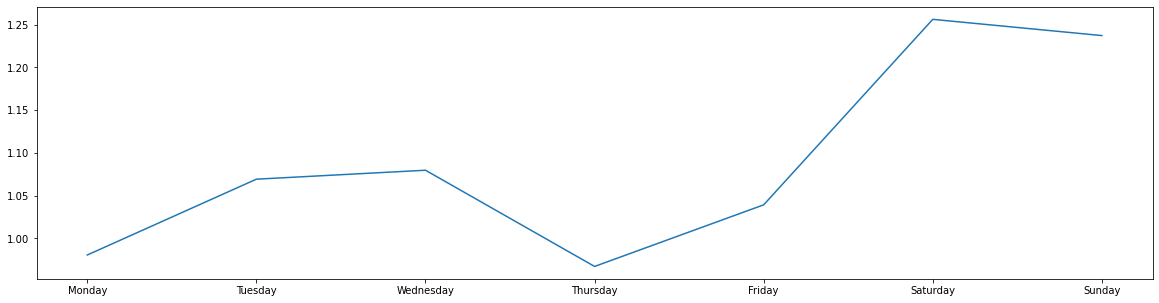

In [20]:
weekday_groups = df.groupby(df.index.weekday)

result = weekday_groups.mean()

weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_index = pd.Index(weekday_names)

result.index = weekday_index[result.index]

plt.plot(result.index, result['Global_active_power'])

## Mês

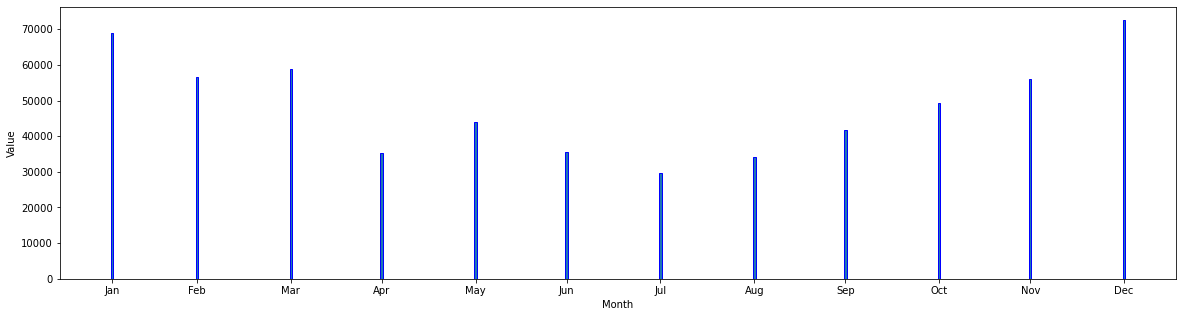

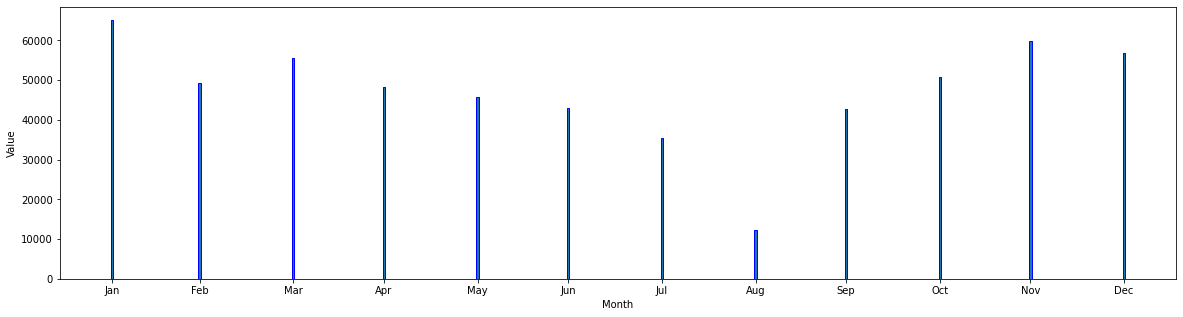

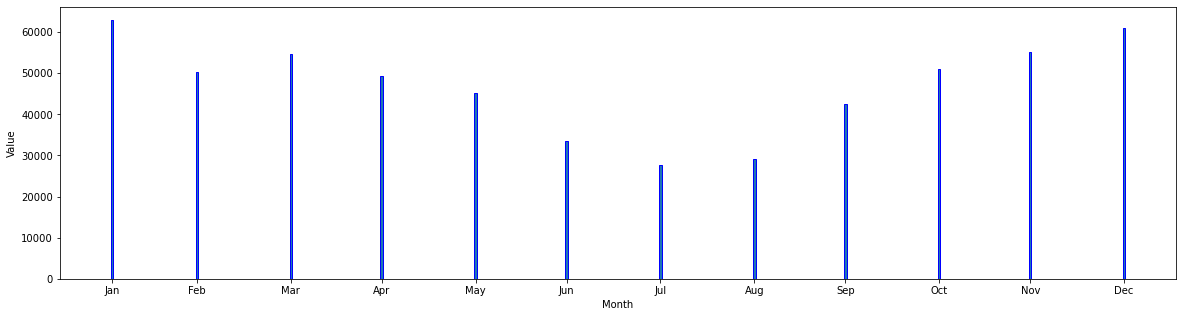

In [22]:
monthly_sum_2007 = df.loc['2007-01-01':'2007-12-31'].groupby(pd.Grouper(freq='M'))['Global_active_power'].sum()
monthly_sum_2008 = df.loc['2008-01-01':'2008-12-31'].groupby(pd.Grouper(freq='M'))['Global_active_power'].sum()
monthly_sum_2009 = df.loc['2009-01-01':'2009-12-31'].groupby(pd.Grouper(freq='M'))['Global_active_power'].sum()

fig, ax = plt.subplots()
ax.bar(monthly_sum_2007.index, monthly_sum_2007.values, ec='blue')
ax.set_xticks(monthly_sum_2007.index)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_xlabel('Month')
ax.set_ylabel('Value')

fig, ax = plt.subplots()
ax.bar(monthly_sum_2008.index, monthly_sum_2008.values, ec='blue')
ax.set_xticks(monthly_sum_2008.index)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_xlabel('Month')
ax.set_ylabel('Value')

fig, ax = plt.subplots()
ax.bar(monthly_sum_2009.index, monthly_sum_2009.values, ec='blue')
ax.set_xticks(monthly_sum_2009.index)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_xlabel('Month')
ax.set_ylabel('Value')

plt.show()

Podemos ver que a estação do ano influencia no gasto de energia médio.

# Correlação

Existe uma correlação entre esses dados?